# Installation

The pywapor package depends on several other packages, most of them get installed automatically when we install pywapor. The GDAL package needs to be installed manually however. Luckily, it is already installed on the backend computer used by Google Colab. We can verify that GDAL is installed by running the following commands.

In [ ]:
from osgeo import gdal
print("Using GDAL version:", gdal.__version__)

Using GDAL version: 2.2.3


Now that we know that Python is able to import the GDAL package, we can install pywapor by running the following command.



In [ ]:
!pip install pywapor --quiet

     |████████████████████████████████| 127 kB 4.7 MB/s 
     |████████████████████████████████| 206 kB 8.1 MB/s 
     |████████████████████████████████| 6.6 MB 9.1 MB/s 
     |████████████████████████████████| 15.4 MB 37 kB/s 
     |████████████████████████████████| 405 kB 46.3 MB/s 
     |████████████████████████████████| 222 kB 58.9 MB/s 
     |████████████████████████████████| 219 kB 47.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 3.2 MB 41.2 MB/s 
     |████████████████████████████████| 961 kB 35.8 MB/s 


If everything went well, we can now import pywapor in Python, let's try it (fingers crossed)!

In [ ]:
import pywapor
print("Using pywapor version:", pywapor.__version__)

Using pywapor version: 2.1.1


# ETLook Input

In order to run the ETLook model, we first need to collect the necessary inputs. Two types of spatial data are required, temporal and static data. 

The functions `get_static_input_data_reqs()` and `get_temp_input_data_reqs()` can give you two lists with information (such as the required filenames, units, etc.) about these inputs.













In [ ]:
static_data_req = pywapor.general.variables.get_static_input_data_reqs()
temporal_data_req = pywapor.general.variables.get_temp_input_data_reqs()

print("--STATIC DATA REQ.--")
for i, variable in enumerate(static_data_req):
  print(i, variable["name"], variable["unit"])

print("\n --TEMPORAL DATA REQ.--")
for i, variable in enumerate(temporal_data_req):
  print(i, variable["name"], variable["unit"])



--STATIC DATA REQ.--
0 Latitude [DD]
1 Longitude [DD]
2 Slope [degrees]
3 Slope Aspect [degrees]
4 Bulk Stomatal Resistance [s/m]
5 Digital Elevation Model [m.a.s.l]
6 Landmask [-]
7 Maximum Light Use Efficiency [gr/MJ]
8 Maximum Obstacle Height [m]
9 Air Temperature (yearly amplitude) [K]

 --TEMPORAL DATA REQ.--
0 Albedo [-]
1 Land Surface Temperature [K]
2 Normalized Difference Vegetation Index [-]
3 Air Pressure at sea level (daily average) [kPa]
4 Air Pressure at sea level (instanteneous) [kPa]
5 Air Pressure at surface level (instanteneous) [kPa]
6 Precipitation [mm/day]
7 Specific Humidity (daily average) [kg/kg]
8 Specific Humidity (instanteneous) [kg/kg]
9 Air Temperature (daily average) [C]
10 Air Temperature (instanteneous) [C]
11 Air Temperature (daily maximum) [C]
12 Air Temperature (daily minimum) [C]
13 Transmissivity [-]
14 Windspeed (daily average) [m/s]
15 Windspeed (instanteneous) [m/s]
16 Total Precipitable Water Vapout [mm]
17 Instantaneous Data Time [hour]


Each of these variables can be collected from whichever source you wish to use, as long as you make sure the units are correct, the data is stored as a GeoTIFF (1 band per file, 1 file for each variable and date), the files all have the same no-data-value and they all have the same projection and resolution.

For your convenience, the pywapor package has a function that can collect all this data from selected sources (using the [watertools package](https://github.com/TimHessels/watertools), with which you can also download many other datasets) and make sure the data is stored in the correct format and folder structure. 

Because some of the data portals used require a user to login with a username and a password, we first need to set those up. In this Notebook, we will need a `NASA Eearthdata Login` to collect MODIS, CHIRPS and MERRA2 datasets, which can be created [over here](https://urs.earthdata.nasa.gov/users/new).

> ⚠️ 

> After creating your account, you still need to accept some 'Terms of Use', before you can continue with this notebook. To do that, login to your newly created account and go to:

> `Applications > Authorized Apps > Approve More Applications`

> There, make sure the two following applications are authorized:
1. `NASA GESDISC DATA ARCHIVE`
2. `LP DAAC Data Pool`

> ⚠️

Once you have your account set up that, we can enter our username and password by running the following code.


In [ ]:
import watertools
watertools.Set_Up_watertools.create_key()
watertools.Set_Up_watertools.set_up_account("NASA")

Type in your account username for NASAbroodj3ham
Type in your password for NASAN0tmyrealpassword


()

Now we can run a little test to see if the username and password are correct and the required applications have been authorized.

In [ ]:
succes = pywapor.general.tests.nasa_account()

check_cross = {True: "\U00002705", False: "\U0000274C"}

print("NASA-account working:", check_cross[succes])

NASA-account working: ✅


If that works, then its finally time to download some data! 

First we define a `startdate` and `enddate`, our boundingbox through `latlim` and `lonlim` and we give a `project_folder` in which all our data will be stored. Here I've chosen an `enddate` identical to the `startdate`, so we will only process 1 day (i.e. the 7th of July, 2019). The given boundingbox will show us the Fayoum irrigation scheme in Egypt.

Then we can run `pywapor.pre_et_look.main()` to start the downloading.

In [ ]:
startdate = "2019-07-07"
enddate = "2019-07-07"
latlim = [29.0, 29.6]
lonlim = [30.3, 31.1]
project_folder = r"/my_first_ETLook_run/"

pywapor.pre_et_look.main(project_folder, startdate, enddate, latlim, lonlim)


Download daily MODIS land surface temperature data for period 2019-07-07 till 2019-07-07
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Download daily MODIS land surface temperature data for period 2019-07-07 till 2019-07-07
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Download 16-daily MODIS NDVI data for period 2019-06-29 till 2019-07-15
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Download 16-daily MODIS NDVI data for period 2019-06-29 till 2019-07-15
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Download Albedo

Download daily MODIS Albedo data for period 2019-07-07 till 2019-07-07
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Download CHIRPS

Download daily CHIRPS rainfall data for the period 2019-07-07 till 2019-07-07
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Download SRTM al

()

After downloading the files, we can check if all the required files exist. Using the [`ls` unix command](https://en.wikipedia.org/wiki/Ls), we can see the contents of a folder, and with the asterices we can see the contents of recursive folders. Our `project_folder` now contains the following subdirectories and files.

> Actually, it also contains a folder called `RAW`, which you can see by running `!ls */*` instead. This folder holds some intermediate files that were used to create the final ETLook inputs.



In [ ]:
!ls ETLook*/*

ETLook_input_MODIS/20190707:
ALBEDO_20190707.tif	  Precipitation_20190707.tif  tair_min_24_20190707.tif
LST_20190707.tif	  qv_24_20190707.tif	      Time_20190707.tif
NDVI_20190707.tif	  qv_inst_20190707.tif	      Trans_24_20190707.tif
Pair_24_0_20190707.tif	  tair_24_20190707.tif	      wind_24_20190707.tif
Pair_inst_0_20190707.tif  tair_inst_20190707.tif      wind_inst_20190707.tif
Pair_inst_20190707.tif	  tair_max_24_20190707.tif    wv_inst_20190707.tif

ETLook_input_MODIS/Static:
Aspect.tif			   Lon.tif
Bulk_Stomatal_resistance_2019.tif  LUEmax_2019.tif
DEM.tif				   Maximum_Obstacle_Height_2019.tif
LandMask_2019.tif		   Slope.tif
Lat.tif				   Tair_amp_2019.tif


Using the lists we aqcuired earlier (`temporal_data_req` and `static_data_req`), we can also explicitly check if all the required data is there.


In [ ]:
import os

year, month, day = startdate.split("-")
ETLook_input_folder = os.path.join(project_folder, "ETLook_input_MODIS")

print("\n --STATIC DATA REQ.--")
for i, variable in enumerate(static_data_req):
  path = variable["filepath"].format(input_folder = ETLook_input_folder, 
                                     year = year, 
                                     month = month, 
                                     day = day)
  yesno = check_cross[os.path.isfile(path)]
  print(i, yesno, path)

print("\n --TEMPORAL DATA REQ.--")
for i, variable in enumerate(temporal_data_req):
  path = variable["filepath"].format(input_folder = ETLook_input_folder, 
                                     year = year, 
                                     month = month, 
                                     day = day)
  yesno = check_cross[os.path.isfile(path)]
  print(i, yesno, path)






 --STATIC DATA REQ.--
0 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/Lat.tif
1 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/Lon.tif
2 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/Slope.tif
3 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/Aspect.tif
4 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/Bulk_Stomatal_resistance_2019.tif
5 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/DEM.tif
6 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/LandMask_2019.tif
7 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/LUEmax_2019.tif
8 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/Maximum_Obstacle_Height_2019.tif
9 ✅ /my_first_ETLook_run/ETLook_input_MODIS/Static/Tair_amp_2019.tif

 --TEMPORAL DATA REQ.--
0 ✅ /my_first_ETLook_run/ETLook_input_MODIS/20190707/ALBEDO_20190707.tif
1 ✅ /my_first_ETLook_run/ETLook_input_MODIS/20190707/LST_20190707.tif
2 ✅ /my_first_ETLook_run/ETLook_input_MODIS/20190707/NDVI_20190707.tif
3 ✅ /my_first_ETLook_run/ETLook_input_MODIS/20190707/Pair_24_0_2

Now that we know that all the required files exist, it is also a good idea to check if there is any data inside those files! For all we know right now, they might just be a bunch of empty files.

We can create a simple map using the code below, notice that the idx variable refers to the numbers seen above next to the different inputs, e.g. `idx = 1` refers to `Land Surface Temperature`.

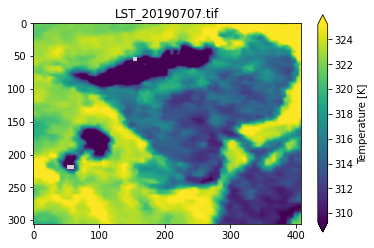

In [ ]:
idx = 1

variable = temporal_data_req[idx]

quantity = variable["quantity"]
unit = variable["unit"]
tif_file = variable["filepath"].format(input_folder = ETLook_input_folder, 
                                        year = year, 
                                        month = month, 
                                        day = day)

pywapor.general.plot.tif(tif_file, quantity, unit)

Now that we have all the required input files its time to run the actual model!

# Running ETLook

To run the model, we need to give three inputs to `pywapor.et_look_code.main()`:

1.   The `input_folder`, wich we already defined above as `ETLook_input_folder`.
2.   An `output_folder`, in which the model outputs will be stored.
3.   And finally, the `date` for which to run the model, defined as a [datetime-object](https://docs.python.org/3/library/datetime.html).

In [ ]:
import datetime as dt

ETLook_output_folder = os.path.join(project_folder, "ETLook_output_MODIS")
date = dt.datetime.strptime(startdate, "%Y-%m-%d")

pywapor.et_look_code.main(ETLook_input_folder, ETLook_output_folder, date)

'se_root' not found.
USING ETLook_v2


You'll see an message indicating that `'se_root'` was `not found`. This is no problem, ETLook can calculate `se_root` with the inputs we've provided, but it can also be given as input in case you have some great soil moisture dataset lying around.

Now that the model is finished, we can check again if any new files have been created, just like we did before.

In [ ]:
!ls ETLook*/*

ETLook_input_MODIS/20190707:
ALBEDO_20190707.tif	  Precipitation_20190707.tif  tair_min_24_20190707.tif
LST_20190707.tif	  qv_24_20190707.tif	      Time_20190707.tif
NDVI_20190707.tif	  qv_inst_20190707.tif	      Trans_24_20190707.tif
Pair_24_0_20190707.tif	  tair_24_20190707.tif	      wind_24_20190707.tif
Pair_inst_0_20190707.tif  tair_inst_20190707.tif      wind_inst_20190707.tif
Pair_inst_20190707.tif	  tair_max_24_20190707.tif    wv_inst_20190707.tif

ETLook_input_MODIS/Static:
Aspect.tif			   Lon.tif
Bulk_Stomatal_resistance_2019.tif  LUEmax_2019.tif
DEM.tif				   Maximum_Obstacle_Height_2019.tif
LandMask_2019.tif		   Slope.tif
Lat.tif				   Tair_amp_2019.tif

ETLook_output_MODIS/20190707:
e_24_mm_20190707.tif	   int_mm_20190707.tif	    t_24_mm_20190707.tif
et_24_mm_20190707.tif	   se_root_20190707.tif     vc_20190707.tif
et_ref_24_mm_20190707.tif  stress_vpd_20190707.tif


If everything went well, there should be a new folder called `ETLook_output_MODIS`, showing several output files that have been created.



# ETLook Output

Like we did before, we can plot a map by giving a path to a tif-file.

In [ ]:
date_string = date.strftime("%Y%m%d")

tif_file = os.path.join(ETLook_output_folder, 
                        date_string, 
                        f"et_24_mm_{date_string}.tif")

quantity = "Evapotranspiration"
unit = "[mm/day]"

pywapor.general.plot.tif(tif_file, quantity, unit)

Or we can open the map to calculate some statistics.

In [ ]:
import numpy as np

ds = gdal.Open(tif_file)
array = ds.GetRasterBand(1).ReadAsArray()

print("resolution:", array.shape)
print("total pixels:", array.size)
print("number of pixels with missing data:", np.sum(np.isnan(array)))
print("maximum value: {0:.2f}".format(np.nanmax(array)))
print("minimum value: {0:.2f}".format(np.nanmin(array)))
print("mean: {0:.2f}".format(np.nanmean(array)))
print("median: {0:.2f}".format(np.nanmedian(array)))


And plot a histogram.

In [ ]:
import matplotlib.pyplot as plt

array = array[np.isfinite(array)]
histogram = plt.hist(array, bins = 30, zorder = 10)
title = plt.title("n = {0}".format(array.size))
plt.gca().set_facecolor("lightgray")
plt.grid(zorder = 0)
xlabel = plt.xlabel("Evapotranspiration [mm/day]")
ylabel = plt.ylabel("Number of pixels [-]")
